In [2]:
print(gdf.columns)


Index(['Borough', 'Block', 'Lot', 'CD', 'BCT2020', 'BCTCB2020', 'CT2010',
       'CB2010', 'SchoolDist', 'Council', 'ZipCode', 'FireComp', 'PolicePrct',
       'HealthCent', 'HealthArea', 'Sanitboro', 'SanitDistr', 'SanitSub',
       'Address', 'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4',
       'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight',
       'SplitZone', 'BldgClass', 'LandUse', 'Easements', 'OwnerType',
       'OwnerName', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'AreaSource', 'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal',
       'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode',
       'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand', 'AssessTot',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tract2

# 데이터가 너무 커서 경량화를 진행 -> 맨허튼으로 초점 

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. 전체 PLUTO 데이터 불러오기
gdf = gpd.read_file("/Users/com/Desktop/심화프로젝트/new data/nyc_mappluto_25v2_shp/MapPLUTO.shp")

# 2. 좌표계 통일 (EPSG:4326 - 위경도)
gdf = gdf.to_crs(epsg=4326)

# 3. 맨해튼(Manhattan) 데이터만 필터링
gdf_manhattan = gdf[gdf['BoroName'] == 'Manhattan'].copy()

# 4. 불필요한 컬럼 제거 (메모리 경량화)
columns_to_keep = ['BoroName', 'LandUse', 'UnitsRes', 'geometry']
gdf_manhattan = gdf_manhattan[columns_to_keep]

# 5. 지오메트리 단순화 (단위는 도 단위의 허용 오차, 예: 0.0005 정도 추천)
gdf_manhattan['geometry'] = gdf_manhattan['geometry'].simplify(tolerance=0.0005, preserve_topology=True)

# 6. 확인용 시각화
fig, ax = plt.subplots(figsize=(10, 10))
gdf_manhattan.plot(ax=ax, edgecolor='black', column='UnitsRes', cmap='OrRd', legend=True)
ax.set_title("Simplified Map of Manhattan (Residential Units Highlighted)", fontsize=14)
plt.show()


KeyError: 'BoroName'

<Axes: >

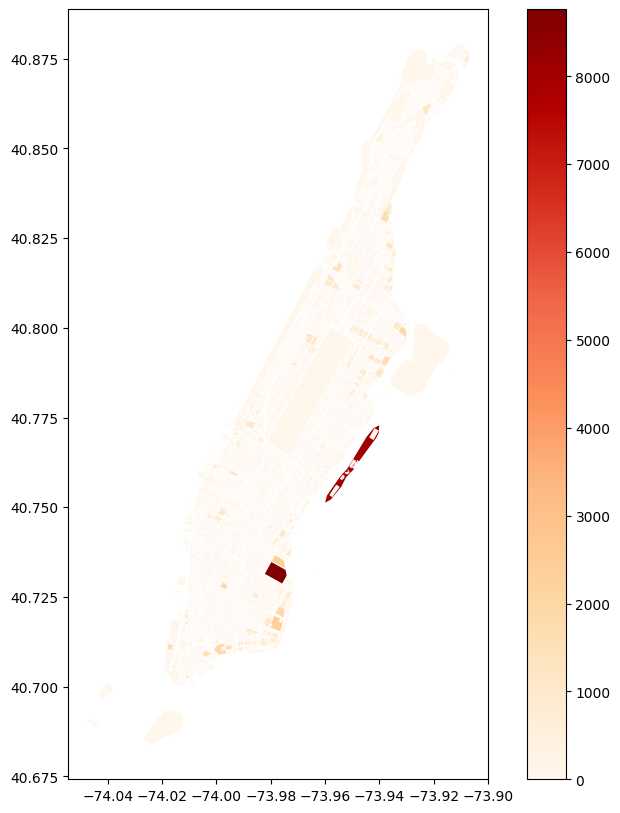

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. 전체 PLUTO 데이터 불러오기
gdf = gpd.read_file("/Users/com/Desktop/심화프로젝트/new data/nyc_mappluto_25v2_shp/MapPLUTO.shp")

# 2. 좌표계 통일 (EPSG:4326 - 위경도)
gdf = gdf.to_crs(epsg=4326)

# Manhattan의 BoroCode는 1
gdf_manhattan = gdf[gdf['BoroCode'] == 1].copy()

# 좌표계 변환
gdf_manhattan = gdf_manhattan.to_crs(epsg=4326)

# 필요한 컬럼만 유지
columns_to_keep = ['BoroCode', 'LandUse', 'UnitsRes', 'geometry']
gdf_manhattan = gdf_manhattan[columns_to_keep]

# 지오메트리 단순화
gdf_manhattan['geometry'] = gdf_manhattan['geometry'].simplify(tolerance=0.0005)

# 시각화 확인
gdf_manhattan.plot(column='UnitsRes', cmap='OrRd', legend=True, figsize=(10, 10))


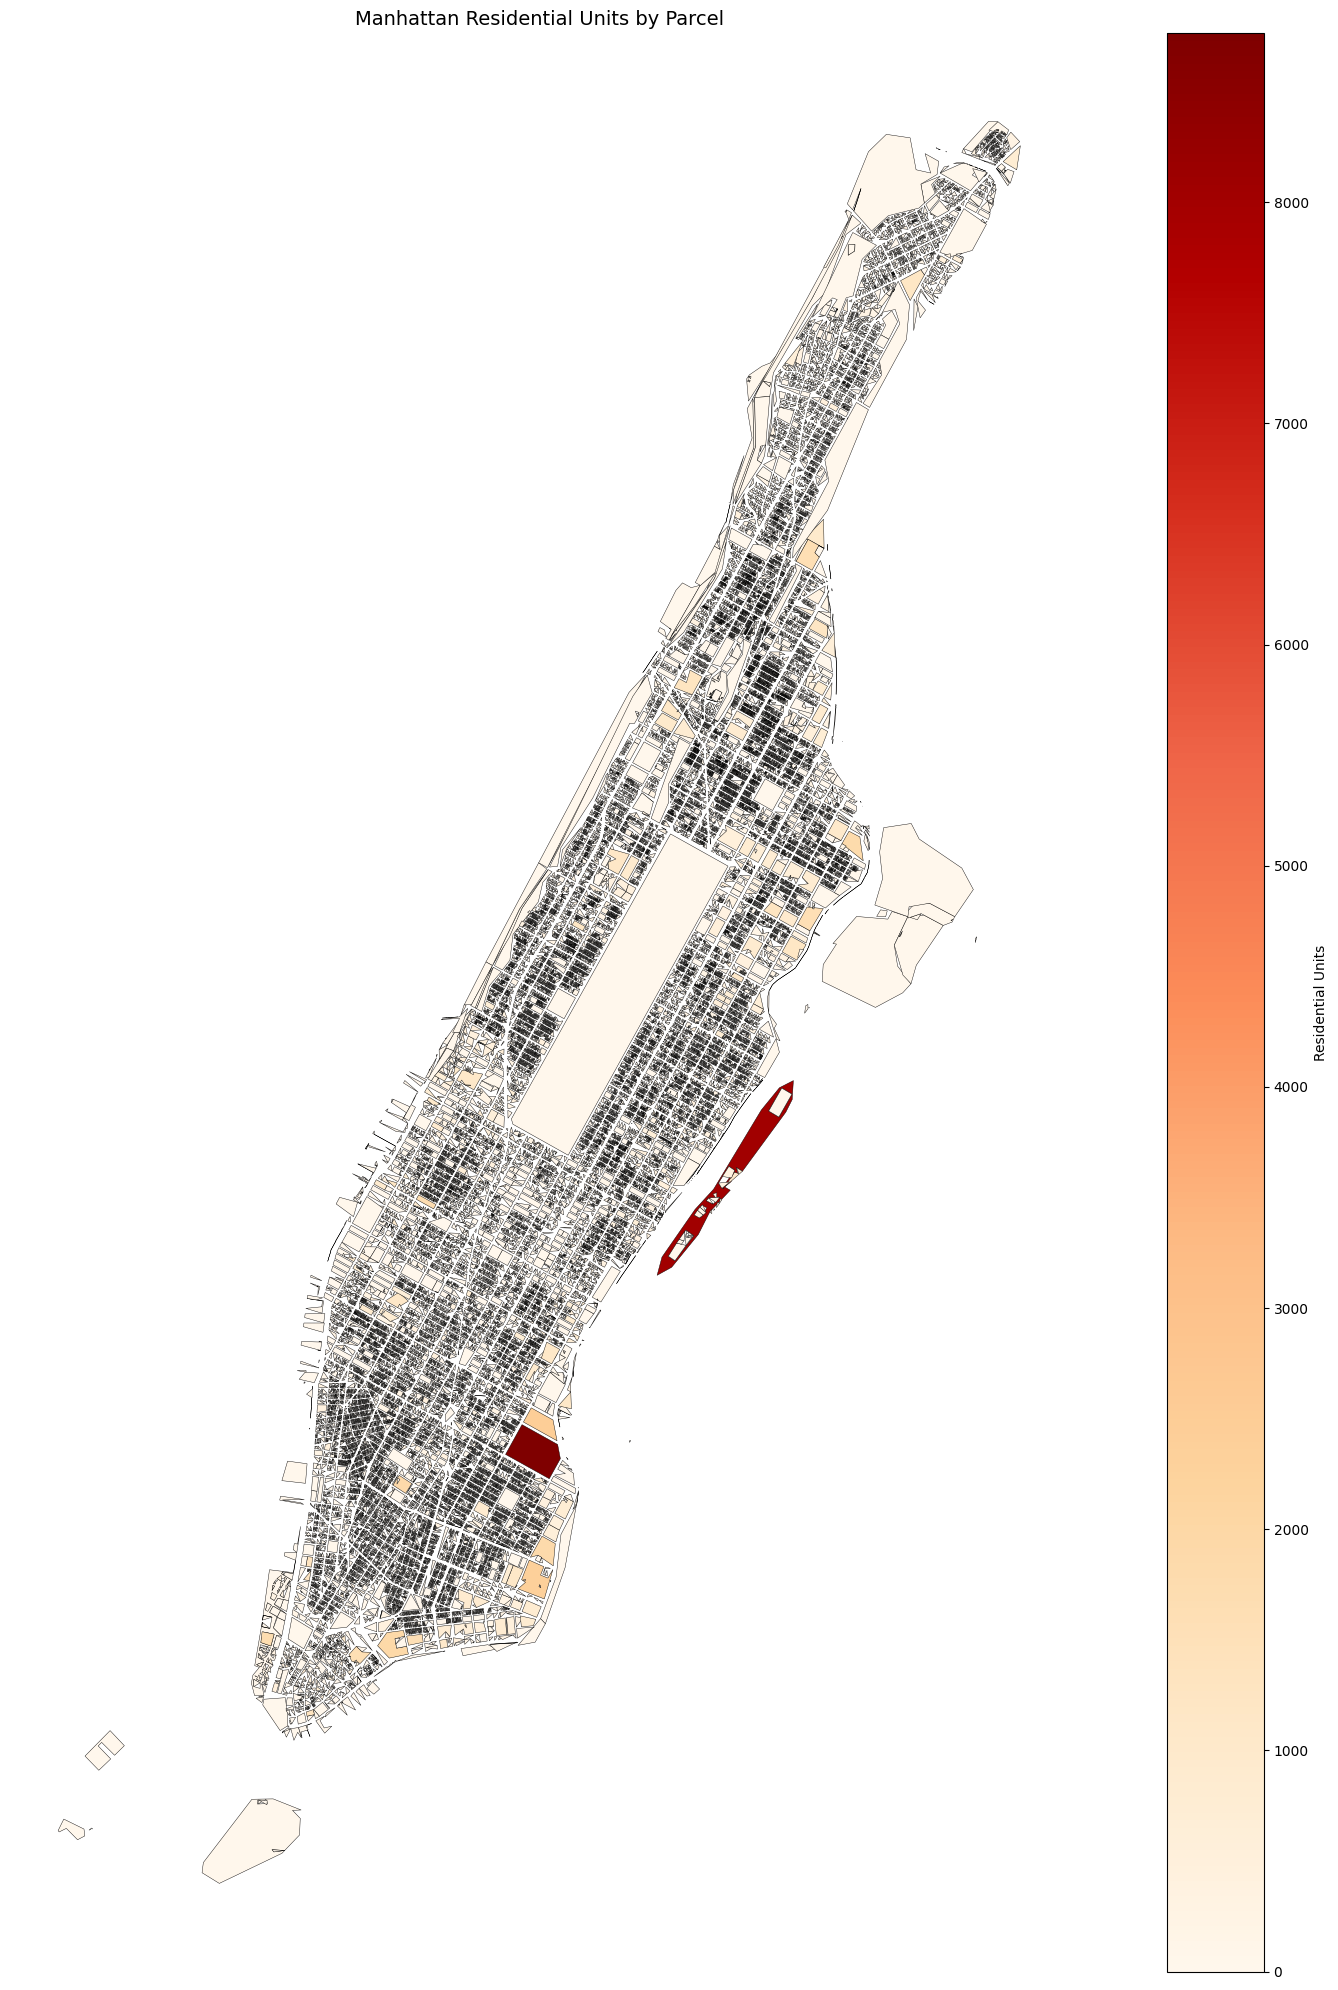

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. SHP 파일 로드
gdf = gpd.read_file("/Users/com/Desktop/심화프로젝트/new data/nyc_mappluto_25v2_shp/MapPLUTO.shp")

# 2. 좌표계 변환 (EPSG:4326)
gdf = gdf.to_crs(epsg=4326)

# 3. Manhattan만 필터링 (BoroCode == 1)
gdf_manhattan = gdf[gdf['BoroCode'] == 1].copy()

# 4. 필요한 컬럼만 추출
columns_to_keep = ['BoroCode', 'LandUse', 'UnitsRes', 'geometry']
gdf_manhattan = gdf_manhattan[columns_to_keep]

# 5. 지오메트리 단순화
gdf_manhattan['geometry'] = gdf_manhattan['geometry'].simplify(tolerance=0.0005)

# 6. 시각화
fig, ax = plt.subplots(figsize=(20,20))
gdf_manhattan.plot(
    ax=ax,
    column='UnitsRes',
    cmap='OrRd',
    edgecolor='black',
    linewidth=0.3,
    legend=True,
    legend_kwds={'label': "Residential Units"}
)
ax.set_title("Manhattan Residential Units by Parcel", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()
